# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomPerspective()
])

test_transform = transforms.ToTensor()

# Create training set and define training dataloader
training_set = datasets.MNIST(root="data", train=True, download=True, transform=train_transform)
training_loader = DataLoader(training_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = datasets.MNIST(root="data", train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_set, batch_size=64)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The RandomPerspective transform was used to enhance the model capacity of generalization by simulating possible inputs.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


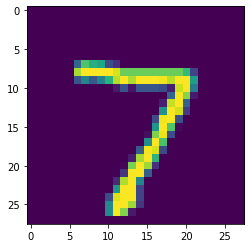

2


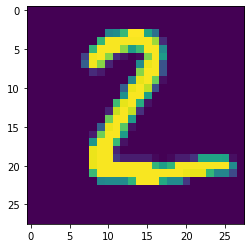

1


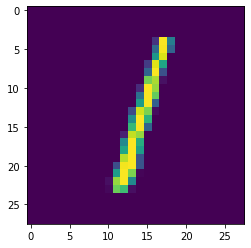

0


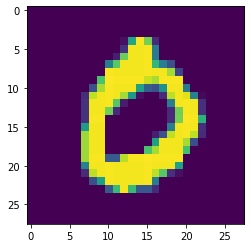

4


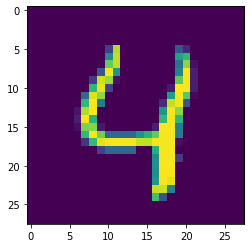

In [4]:
# Explore data
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.fc1 = nn.Linear(32 * 26 * 26, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        
        return x

In [6]:
net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=21632, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [9]:
epochs = 10

for epoch in range(epochs):
    net.train()
    train_loss = 0
    train_loss_history = list()
    
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        
        train_loss_history.append(train_loss)
        
    print(f'Epoch {epoch + 1} training loss: {train_loss/len(training_loader):.5f}')

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/functional.py:594: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:3651.)
  res = torch.lstsq(b_matrix, a_matrix)[0]


Epoch 1 training loss: 0.89802
Epoch 2 training loss: 0.45768
Epoch 3 training loss: 0.37229
Epoch 4 training loss: 0.32900
Epoch 5 training loss: 0.29032
Epoch 6 training loss: 0.27397
Epoch 7 training loss: 0.25117
Epoch 8 training loss: 0.23194
Epoch 9 training loss: 0.22979
Epoch 10 training loss: 0.21124


Plot the training loss (and validation loss/accuracy, if recorded).

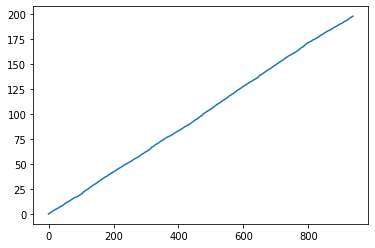

In [10]:
plt.plot(train_loss_history, label= 'Training Loss')

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()

accuracy = correct/total
print(f"Accuracy on the test images: {accuracy*100:.2f}%")

Accuracy on the test images: 97.20%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
# Increasing the number of epochs 
epochs = 15

#Decreasing the learning rate
optimizer = optim.Adam(net.parameters(), lr = 0.0005)

for epoch in range(epochs):
    net.train()
    train_loss = 0
    train_loss_history = list()
    
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        
        train_loss_history.append(train_loss)
        
    print(f'Epoch {epoch + 1} training loss: {train_loss/len(training_loader):.5f}')

Epoch 1 training loss: 0.18514
Epoch 2 training loss: 0.17552
Epoch 3 training loss: 0.16973
Epoch 4 training loss: 0.16158
Epoch 5 training loss: 0.15926
Epoch 6 training loss: 0.15637
Epoch 7 training loss: 0.14998
Epoch 8 training loss: 0.15083
Epoch 9 training loss: 0.14545
Epoch 10 training loss: 0.14309
Epoch 11 training loss: 0.14108
Epoch 12 training loss: 0.13589
Epoch 13 training loss: 0.13378
Epoch 14 training loss: 0.13123
Epoch 15 training loss: 0.13300


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()

        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()

accuracy = correct/total
print(f"Accuracy on the test images: {accuracy*100:.2f}%")

Accuracy on the test images: 97.76%


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
torch.save(net.state_dict(), 'checkpoint.pt')